# Simulacro - Ejercicio Etapa 2

“Al entregar la solución de este parcial, yo, Natalia Villegas Calderon con código 202113370 me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Ni usaré alguna IA para resolver las preguntas del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial”.

Los errores encontrados son:
* a.	Ingeniería de características
Los datos cargados no coincide con el formato adecuado para su carga, debido a que los datos que se tienen estan en xlx y no en csv.

    * i.	Selección de variables: En primer lugar se considera 'readadmitted' como una variable predictoria, cuando este es el target. Adicionalmente, no se revisa la correlacion de las variables, duplicados o faltantes. 
    * ii.	Preparación de variables: Se aplica one hot encoding unicamente a una de las variables categoricas y adicionalmente, se codifica erroneamente la variable 'readmitted' que aunque es categorica, en realidad es la variable target de prediccion.
* b.	Desarrollo del modelo: KNN se basa en distancia entre los puntos, por lo que es vital realizar algun tipo de estandarizacion de datos, para que se encuentren en la misma escala. Adicionalmente, no se realiza una busqueda de hiperparametros para encontrar el mejor valor de k.

* c.	Evaluación del modelo: Solo emplean el accuracy sin considerar otras metricas como precision, recall, f1-score, matriz de confusion, entre otras. Adicionalmente, la BD estaba desbalanceada, por lo que estos resultados pueden verse afectados al no hacer alguna tecnica de balanceo de datos.


Las correcciones de los elementos erroneos encontrados se harán en <span style="color:#ff5733">rojo</span>


In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


Cargamos los datos en un dataframe:

In [ ]:
#dd = pd.read_csv("./diabetic_data.csv")


<span style="color:#ff5733">Leemos los datos en formato excel y se transforma para que de forma adecuada lea los datos</span>

In [24]:
dd = pd.read_excel("diabetic_data.xlsx", header=None)
col = dd.iloc[0, 0].split(',')
dd = dd.iloc[1:].reset_index(drop=True) 
dd = dd[0].str.split(',', expand=True)
dd.columns = col
dd.head()

,race,num_lab_procedures,num_medications,age,gender,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,insulin,diabetesMed,change,number_inpatient,number_emergency,readmitted
0,Caucasian,88,32,5,F,9,9,0,1,1,1,Yes,Yes,Yes,0,0,Yes
1,Caucasian,43,19,6,F,4,8,1,1,2,1,Yes,Yes,Yes,0,0,No
2,Caucasian,24,8,5,M,4,5,0,17,2,1,No,No,No,0,0,No
3,Caucasian,4,8,6,F,1,8,0,7,1,1,No,No,No,0,0,Yes
4,AfricanAmerican,46,16,7,M,4,6,0,7,1,1,No,Yes,Yes,0,0,Yes


Codificamos (usamos One-Hot Encoding) las columnas categóricas (dejando N-1 columnas por categoría.). Como son binarias, podemos reemplazar directamente.

In [ ]:
#from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore', drop='if_binary')
# transformed = enc.fit_transform(dd[['gender', 'readmitted']])



# dd[['gender', 'readmitted']] = transformed.toarray()


<span style="color:#ff5733">Arreglamos el One Hot para que sea de todas las variables categoricas y adicionalmente, no se haga transformación inadecuada a la variable target</span>

In [23]:
variables_cat= ["race", "gender", "age", "admission_type_id", 
    "discharge_disposition_id", "admission_source_id", 
    "insulin", "change", "diabetesMed" ]

In [25]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Aplicar One-Hot Encoding
enc = OneHotEncoder(handle_unknown='ignore', drop='if_binary')

# Convertir a matriz densa todas las variables categoricas
transformed = enc.fit_transform(dd[variables_cat]).toarray()

# Convertir en DataFrame con nombres de columnas generados por el encoder
encoded_df = pd.DataFrame(transformed, columns=enc.get_feature_names_out())

# Concatenar los dataframes para agregar las nuevas columnas codificadas
dd = pd.concat([dd.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Eliminar las columnas categóricas originales
dd = dd.drop(columns=variables_cat)

dd.head()


,num_lab_procedures,num_medications,time_in_hospital,number_diagnoses,num_procedures,number_inpatient,number_emergency,readmitted,race_AfricanAmerican,race_Asian,...,admission_source_id_20,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_9,insulin_Yes,change_Yes,diabetesMed_Yes
0,88,32,9,9,0,0,0,Yes,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,43,19,4,8,1,0,0,No,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,24,8,4,5,0,0,0,No,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,8,1,8,0,0,0,Yes,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,46,16,4,6,0,0,0,Yes,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


Seleccionamos las columnas para el modelo

In [ ]:
#X = dd[['num_lab_procedures', 'num_medications', 'age', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
#       'admission_source_id', 'admission_type_id',
#       'discharge_disposition_id','readmitted']]



<span style="color:#ff5733">Hacemos una correcta division entre las variables descriptivas y el target</span>

In [30]:
variables_num = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications",  "number_emergency","number_inpatient", "number_diagnoses"]
codified_columns = enc.get_feature_names_out(variables_cat)

# Variables explicativas
X = dd[variables_num]
X = pd.concat([X, dd[codified_columns]], axis=1)

# Variable objetivo
y = dd['readmitted']

Realizamos la división de conjuntos

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, X['readmitted'], test_size=0.25, random_state=42)

<span style="color:#ff5733">Correcta division con los nuevos conjuntos, para que no quede la variable objetivo dentro de las explicativas</span>

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Entrenamos un árbol

In [32]:
y_train.shape

(1500,)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [37]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

#acc = accuracy_score(y_test, y_pred)

#print(f"La exactitud del clasificador es de {acc*100}%")

<span style="color:#ff5733">Se calculan mas metricas y graficas de la preduccion</span>

La exactitud del clasificador es de 60.4% 

--- MÉTRICAS DEL ENTRENAMIENTO ---
              precision    recall  f1-score   support

          No       0.64      0.85      0.73       310
         Yes       0.45      0.21      0.29       190

    accuracy                           0.60       500
   macro avg       0.55      0.53      0.51       500
weighted avg       0.57      0.60      0.56       500



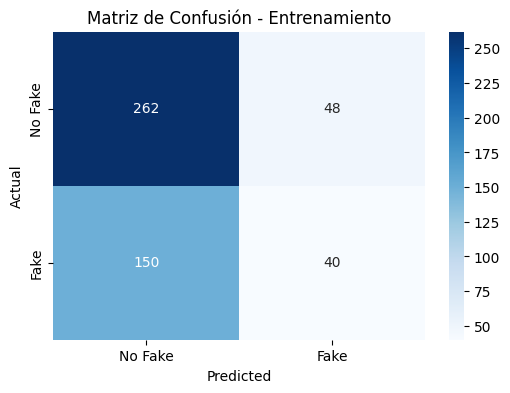

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


acc = accuracy_score(y_test, y_pred)
print(f"La exactitud del clasificador es de {acc*100}% \n")

print("--- MÉTRICAS DEL ENTRENAMIENTO ---")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fake', 'Fake'], yticklabels=['No Fake', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Entrenamiento')
plt.show()


# Preguntas

3. El modelo anterior tenía una exactitud de 0.618 (61.8%), pero presentaba problemas debido a errores en la codificación y calidad de los datos. En contraste, el nuevo modelo, con las correcciones implementadas, ha sido evaluado y presenta una exactitud de 0.604 (60.4%). Aunque la exactitud es ligeramente menor, este modelo es más confiable, ya que ahora se basa en datos correctamente procesados y en una mejor representación de las variables clínicas. Sin embargo, este modelo es muy básico y se podría ver mejorado por medio de una busqueda de hipérparametros y de balancear los datos de ingreso.

4. El modelo de clasificación aporta al objetivo de la Clínica de los Alpes al proporcionar una herramienta basada en datos que ayuda a identificar pacientes con diabetes que tienen un alto riesgo de reingreso, permitiendo tomar decisiones informadas antes de darles el alta. Aunque el modelo aún tiene limitaciones en la detección de todos los pacientes en riesgo, logra una clasificación efectiva en la mayoría de los casos sin reingreso, lo que evita recursos innecesarios en pacientes de bajo riesgo. Esta primera versión del modelo sirve como un punto de partida para mejorar la capacidad predictiva y, con busqueda de hiperparámetros, implementación de otros modelos y técnicas de balanceo de datos, puede evolucionar para capturar mejor los casos críticos. Su implementación aporta a la optimización de recursos hospitalarios, reduce costos asociados a readmisiones y mejora la calidad del cuidado de los pacientes, alineándose con la meta de la clínica de reducir los reingresos y mejorar la atención médica.